# Analysis of Chicago Parking Tickets Data - 1

## Result Figure 1: Visualize the Decreasing Trend of Issued Expired Meter Tickets (Due to ParkChicago App)

![image.png](./Fig1.png)

## Code for getting the result

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geocoder
import requests

## 1) Prepare the data
Prepare the data by years: run the python file __proj_2_pre.py__ to parse the City of Chicago Parking Ticket data accoding to concerned years.

First need to download the City of Chicago Parking Ticket data from https://www.propublica.org/datastore/dataset/chicago-parking-ticket-data

In [2]:
# Parse the recent 5 years history from the raw data
year_vec = ['2012','2013','2014','2015','2016','2017']
numTickets = pd.DataFrame(columns = ['time', 'number'])

In [3]:
k = 0
vio_cont_total = pd.Series()
for i in range(len(year_vec)):
#year = '2010'
    year = year_vec[i]

    filename_c = 'issue_' + year + '.csv'
    #filename_c = 'issue_2018.csv'
    data = pd.read_csv(filename_c, sep=',', low_memory=False) 
    
    data = data[~data.violation_description.str.contains("EXPIRED PLATE OR TEMPORARY REGISTRATION")]
    
    violations = data['violation_description']
    vio_cont = violations.value_counts()
    
    
    vio_meter = vio_cont['EXP. METER NON-CENTRAL BUSINESS DISTRICT'] +\
                vio_cont['EXPIRED METER CENTRAL BUSINESS DISTRICT']
                
    vio_total = len(violations)
    
    vioRate_meter = vio_meter/ vio_total
    
    print('Meter violation rate = ' + str(vioRate_meter))
    
    # put expired meters violation in a dataframe
    searchfor = ['EXP. METER NON-CENTRAL BUSINESS DISTRICT',
                 'EXPIRED METER CENTRAL BUSINESS DISTRICT']
    meters = data[data.violation_description.str.contains('|'.join(searchfor))]
    
    #vio_cont[:5].plot(ax=ax, kind='bar', color='red')
    
    vio_cont_total = vio_cont_total.combine(vio_cont, max, fill_value = 0)
    
    
    ### see data by months
    
    vio_months = []
    for i in range(1, 13):
        if i < 10:
            month = ('0'+str(i))
        else:
            month = (str(i)) 
            
        time_str = year +'-'+ month  
        
        
        #data_tmp = full_df.loc[full_df.issue_date.str.contains(time_str)]
        data_tmp = meters.loc[meters.issue_date.str.contains(time_str)]
        
        vio_months.append([time_str, data_tmp])
        print(time_str, len(data_tmp))
        
    # calculate tickets number by months
    #numTickets = []    
    for i in range(len(vio_months)):
        num = len(vio_months[i][1])
        time_str = vio_months[i][0]
        #numTickets.append([time_str, num])
        item = [time_str, num]
        
        k += 1
        numTickets.loc[k] = item


# sort
vio_cont_total = vio_cont_total.sort_values(ascending=False)    

# fig, ax = plt.subplots()
# ax.tick_params(axis='x', labelsize=15)
# ax.tick_params(axis='y', labelsize=10)
# ax.set_xlabel('Parking Tickets', fontsize=15)
# ax.set_ylabel('Number' , fontsize=15)
# ax.set_title('Top 15', fontsize=15, fontweight='bold')
# vio_cont_total[:15].plot(ax=ax, kind='bar', color='red')

# Rearrange the counts
exp_meter_total = vio_cont_total['EXPIRED METER OR OVERSTAY'] + \
                vio_cont_total['EXP. METER NON-CENTRAL BUSINESS DISTRICT'] +\
                vio_cont_total['EXPIRED METER CENTRAL BUSINESS DISTRICT']

exp_meter_total = pd.Series(exp_meter_total, index=['EXPIRED METER'])

vio_cont_total = vio_cont_total.append(exp_meter_total)
vio_cont_total = vio_cont_total.sort_values(ascending=False)   

vio_cont_total = vio_cont_total.drop(labels=['EXPIRED METER OR OVERSTAY',
                            'EXP. METER NON-CENTRAL BUSINESS DISTRICT',
                            'EXPIRED METER CENTRAL BUSINESS DISTRICT'])


vio_cont_total = vio_cont_total.sort_values(ascending=False) 


Meter violation rate = 0.17625227733226137
2012-01 12
2012-02 6933
2012-03 44138
2012-04 39621
2012-05 36350
2012-06 43331
2012-07 40396
2012-08 44021
2012-09 38991
2012-10 42921
2012-11 43392
2012-12 42563
Meter violation rate = 0.18305806173816982
2013-01 39198
2013-02 31436
2013-03 43800
2013-04 39637
2013-05 39683
2013-06 33296
2013-07 40158
2013-08 39509
2013-09 35634
2013-10 41535
2013-11 41532
2013-12 41385
Meter violation rate = 0.1606539376001994
2014-01 36037
2014-02 35555
2014-03 48334
2014-04 42593
2014-05 37784
2014-06 28408
2014-07 24223
2014-08 22607
2014-09 24421
2014-10 30449
2014-11 25476
2014-12 28314
Meter violation rate = 0.16515805429332875
2015-01 30343
2015-02 22616
2015-03 35703
2015-04 35292
2015-05 34119
2015-06 31836
2015-07 34301
2015-08 32327
2015-09 33193
2015-10 36106
2015-11 35292
2015-12 34065
Meter violation rate = 0.16373386731160453
2016-01 30669
2016-02 30329
2016-03 34517
2016-04 29099
2016-05 29249
2016-06 29569
2016-07 28326
2016-08 30212
2016-0

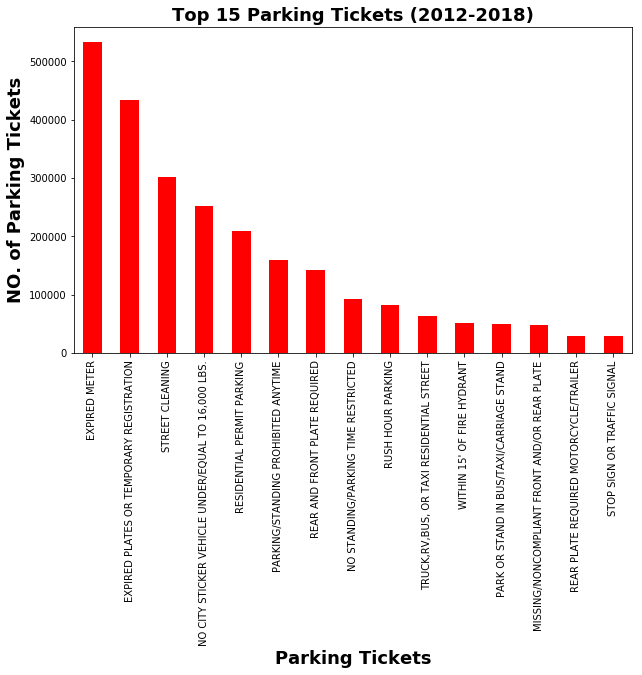

In [4]:
fig, ax = plt.subplots(figsize = (10,6))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Parking Tickets', fontsize=18, fontweight='bold')
ax.set_ylabel('NO. of Parking Tickets' , fontsize=18, fontweight='bold')
ax.set_title('Top 15 Parking Tickets (2012-2018)', fontsize=18, fontweight='bold')
vio_cont_total[:15].plot(ax=ax, kind='bar', color='red')

## 2) Visualize the Decreasing Trend of Issued Expired Meter Tickets (Due to ParkChicago App)

Now Visualize the trend of amount of expired meter tickets by month. It has the trend to decrease over time. The major reason might be the utilization of "ParkChicago" since 2014


In [5]:
# ax = numTickets.number.plot(xticks= numTickets.index[1:len(numTickets.index):12], rot=90, figsize=(10,6))
# ax.set_xticklabels(numTickets.time[1:len(numTickets):12],rotation=90)
# plt.tight_layout()
# plt.xlabel('Time',fontsize=18)
# plt.ylabel('Amount',fontsize=18)
# plt.title('Monthly Amount of Issued Tickets for Expired Meters', fontsize = 18)

In [6]:
from pandas_datareader import fred

numTickets = numTickets.drop(numTickets.index[0:2])
numTickets = numTickets.drop(numTickets.index[-4:])
# ax = numTickets.number.plot(xticks= numTickets.index[1:len(numTickets.index):12], rot=90, figsize=(10,6))
# ax.set_xticklabels(numTickets.time[1:len(numTickets):12],rotation=90)
# plt.tight_layout()
# plt.xlabel('Time',fontsize=18)
# plt.ylabel('Amount',fontsize=18)
# plt.title('Monthly Amount of Issued Tickets for Expired Meters', fontsize = 18)

# Conduct linear regression
from sklearn.linear_model import LinearRegression
X = []
Y = []

for i in range(len(numTickets)):
    x = i
    y = numTickets.iloc[i][1]
    X.append([x])
    Y.append(y)
    
X_train = np.array(X)
Y_train = np.array(Y)    

# training
reg = LinearRegression().fit(X, Y)

Y_test = reg.predict(X_train)

Y_pred = pd.DataFrame(Y_test, index=numTickets.index)

#numTickets.join(Y_pred, ignore_index=True)
numTickets2 = pd.concat([numTickets, Y_pred],  axis=1)
numTickets2.columns = ['time', 'number','pred']

# conduct kernel ridge regression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

clf = KernelRidge(alpha = 0.1)
reg2 = clf.fit(X_train, Y_train)
Y_test2 = reg2.predict(X_train)
Y_pred2 = pd.DataFrame(Y_test2, index=numTickets.index)

#plt.plot(Y_test2)
#plt.show()

param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
              "kernel": [ExpSineSquared(l, p)
                         for l in np.logspace(-2, 2, 10)
                         for p in np.logspace(0, 2, 10)]}           
  
kr = GridSearchCV(KernelRidge(), cv=15, param_grid=param_grid)
reg3 = kr.fit(X_train, Y_train)
Y_test3 = reg3.predict(X_train)
Y_pred2 = pd.DataFrame(Y_test3, index=numTickets.index)

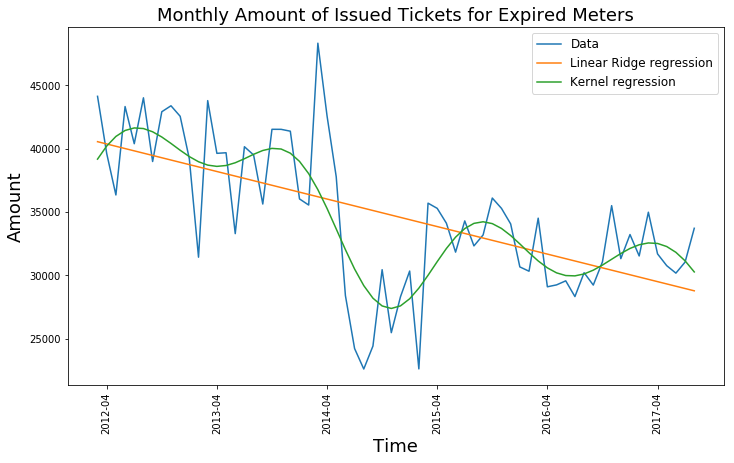

In [7]:
numTickets3 =  pd.concat([numTickets2, Y_pred2], axis=1)
numTickets3.columns = ['time', 'number','pred','pred2']


ax = numTickets3.number.plot(xticks= numTickets3.index[1:len(numTickets3.index):12], rot=90, figsize=(10,6))
ax = numTickets3.pred.plot(xticks= numTickets3.index[1:len(numTickets3.index):12], rot=90, figsize=(10,6))
ax = numTickets3.pred2.plot(xticks= numTickets3.index[1:len(numTickets3.index):12], rot=90, figsize=(10,6))
ax.set_xticklabels(numTickets2.time[1:len(numTickets):12],rotation=90)
plt.tight_layout()
plt.xlabel('Time',fontsize=18)
plt.ylabel('Amount',fontsize=18)
plt.title('Monthly Amount of Issued Tickets for Expired Meters', fontsize = 18)
plt.legend(['Data','Linear Ridge regression','Kernel regression'],fontsize = 12)


numTickets3.to_csv('numTickets.csv')

In [8]:
# from IPython.display import HTML
# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>

# To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')